In [1]:
import pandas as pd
import ast
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# df = pd.read_csv('csv_results/result_12.csv')
df = pd.read_csv('csv_results_mercury/result_4.csv')
df

,seed,True,ARMA,Informer,Informer_para,Informer_lr,RNN
0,82,"[1.1636955896271974, 0.551543475212207, -1.597...","[0.12830905263980336, 0.8050191124008704, -0.0...","[-0.8061889, 0.7053321, 0.70534253, 0.5620106,...","(10, 5)",0.00001,"[0.10502662509679794, 0.7861577868461609, -0.1..."
1,87,"[-3.453753699772272, -0.6902689726117852, -1.0...","[-1.8022103491570092, -1.6097914364143477, 1.0...","[1.5529653, -0.91043615, 1.4454732, 1.5017627,...","(10, 5)",0.00001,"[-1.6759974956512451, -1.5700364112854004, 0.5..."
2,97,"[-1.5808474741224197, -1.2290528862580499, 1.3...","[-1.3072190919593178, -0.6144420136412341, -0....","[0.7007571, 0.56804156, -0.36646238, -0.257615...","(20, 10)",0.00001,"[-1.3642431497573853, -0.3939075469970703, -0...."
3,83,"[-0.6545817741299405, 1.434024738276674, 0.347...","[-0.5221744572880407, 0.2762225748259858, 1.34...","[-0.07038802, -0.20096701, 0.26125422, 0.33570...","(10, 5)",0.00001,"[-0.8942989110946655, 0.17300459742546082, 1.6..."
4,95,"[-1.8408205377327054, -0.03628414253457146, 0....","[-0.4618821121901112, -1.0395328573791636, 0.8...","[-0.4891847, 0.44862878, 0.08868283, -1.275648...","(10, 5)",0.00001,"[-0.2983044683933258, -1.0054142475128174, 0.9..."
5,81,"[-0.5811029134529359, 0.4310004762787655, 0.63...","[0.3470502248439199, -0.6592954249529045, 0.76...","[1.5747224, 0.9273227, -1.8848819, -1.0474167,...","(10, 5)",0.00001,"[0.20504099130630493, -0.5999776124954224, 0.9..."
6,98,"[0.656405584432002, -1.207656509505517, 0.5993...","[0.8923803247908519, -0.27793087146404966, -1....","[-1.1737851, 1.414078, 0.6879183, -0.79264736,...","(10, 5)",0.00010,"[0.6417397856712341, -0.16244962811470032, -1...."
7,79,"[0.3212783034069509, 0.925336215464605, 1.4133...","[-0.020878058423054457, 0.19950127322554992, 0...","[0.831413, 1.2750038, -0.18824336, -0.08520894...","(20, 10)",0.00001,"[0.033322542905807495, 0.5477592349052429, 0.9..."
8,96,"[-1.2741581362232641, -0.735933208541081, 0.27...","[0.11799775594943539, -1.2075134725782466, 0.2...","[1.6088482, 1.0998608, -0.8239751, -0.3267688,...","(20, 10)",0.00001,"[0.15478181838989258, -1.2428622245788574, 0.2..."
9,93,"[0.20159081728108763, -0.832456530206572, -2.3...","[0.5954249532237216, -0.21354165076582518, -0....","[0.6143963, 1.2590696, 1.6316789, -0.87299293,...","(10, 5)",0.00001,"[0.419124573469162, -0.5436233282089233, -0.65..."


In [3]:
arma_mse = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['ARMA'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
informer_mse = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['Informer'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
rnn_mse = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['RNN'].apply(ast.literal_eval).to_list()),multioutput='raw_values')


In [4]:
informer_select = np.array(df['Informer_para'].apply(ast.literal_eval).to_list())[:,0]
informer_lr_select = np.array(df['Informer_lr'].to_list())
informer_select

array([10, 10, 20, 10, 10, 10, 10, 20, 20, 10, 10, 10, 10, 20, 10, 10, 10,
       20, 10, 10, 20, 20, 10, 10, 10, 20, 10, 10, 10, 10, 10, 10, 50, 20,
       10, 10, 20, 10, 20, 20, 10])

In [5]:
informer_lr_select

array([1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-04, 1.e-05,
       1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05,
       1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05,
       1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05,
       1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05,
       1.e-05])

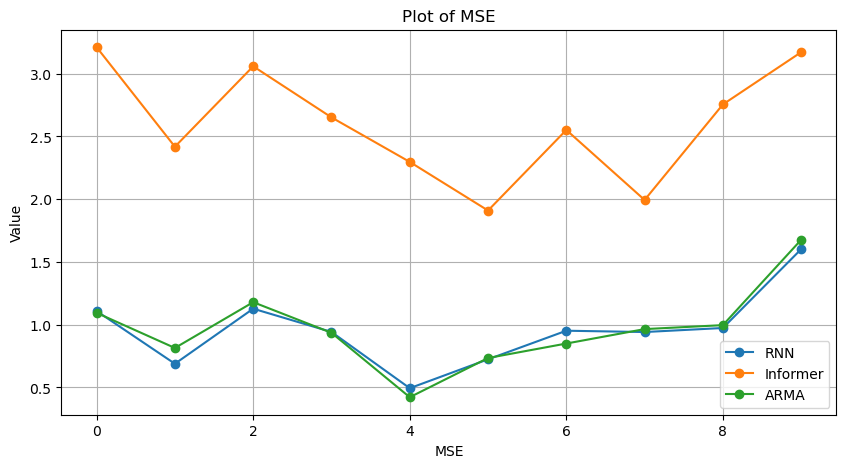

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the array
plt.figure(figsize=(10, 5))
plt.plot(rnn_mse,label = 'RNN', marker='o')  # Using 'o' as a marker for each data point
plt.plot(informer_mse,label = 'Informer', marker='o')  # Using 'o' as a marker for each data point
plt.plot(arma_mse,label = 'ARMA', marker='o')  # Using 'o' as a marker for each data point
plt.title('Plot of MSE')
plt.xlabel('MSE')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()


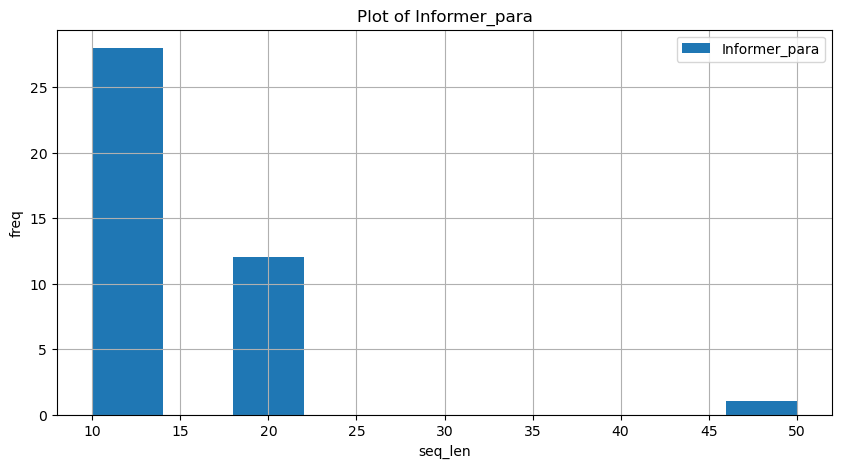

In [7]:

# Plotting the array
plt.figure(figsize=(10, 5))
plt.hist(informer_select,label = 'Informer_para')  # Using 'o' as a marker for each data point
plt.title('Plot of Informer_para')
plt.xlabel('seq_len')
plt.ylabel('freq')
plt.grid(True)
plt.legend()
plt.show()

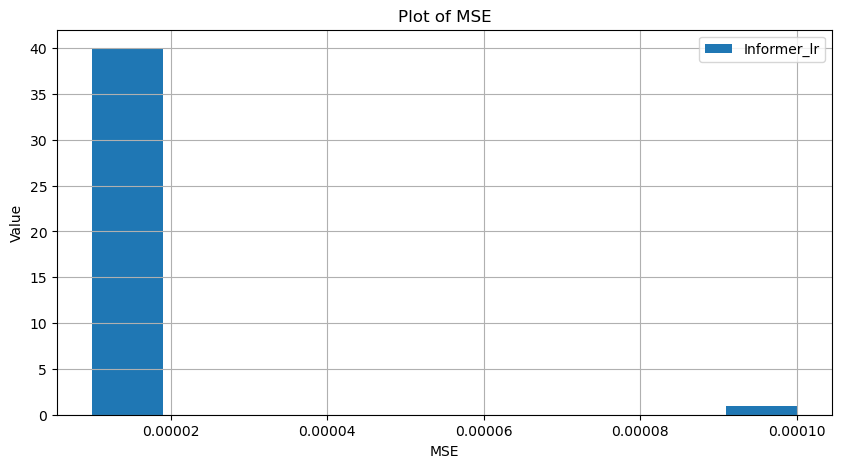

In [8]:
plt.figure(figsize=(10, 5))
plt.hist(informer_lr_select,label = 'Informer_lr')  # Using 'o' as a marker for each data point
plt.title('Plot of MSE')
plt.xlabel('MSE')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()